In [2]:
import numpy as np

# Aggregations: Min, Max, and Everything In Between

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## **Summing the Values in an Array**

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [4]:
L = np.random.random(100)
print(L)
sum(L)

[0.31508798 0.92161381 0.72550957 0.60659179 0.72895089 0.45746669
 0.37395032 0.85233193 0.46558673 0.69223539 0.2717253  0.24459877
 0.37171858 0.57398834 0.99937295 0.46697611 0.13389168 0.10975529
 0.2252194  0.6929276  0.03653508 0.36165689 0.54201346 0.43601454
 0.61308375 0.53023571 0.37240455 0.5780007  0.97311781 0.96595058
 0.06007218 0.21750354 0.38963456 0.24573017 0.43112741 0.68836938
 0.79431717 0.61123338 0.48876571 0.00888213 0.20893036 0.19462702
 0.42629862 0.67032853 0.85807831 0.9784626  0.43271283 0.38210389
 0.69612339 0.80416946 0.00301698 0.05328704 0.17241821 0.80335175
 0.6513144  0.66738191 0.02709499 0.4103315  0.49260802 0.65151143
 0.21514796 0.96834403 0.84126449 0.75437406 0.65379258 0.97294264
 0.33123979 0.30458398 0.52207026 0.55763879 0.92543149 0.02195198
 0.3222733  0.96316    0.11542704 0.4323755  0.97844942 0.68149382
 0.39779477 0.18521641 0.6737362  0.92537434 0.92189109 0.74050957
 0.81098986 0.22395288 0.91824992 0.80402861 0.42813415 0.0895

53.77367541746769

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [5]:
np.sum(L)

53.77367541746769

However, **because NumPy executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:**

In [6]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

85.8 ms ± 667 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
364 µs ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Remember: the **sum** function and the **np.sum** function are not identical. 
**Their optional arguments have different meanings**, and **np.sum** is aware of multiple array dimensions.

## **Minimum and Maximum**

Python has built-in **min** and **max** functions, used to find the minimum value and maximum value of any given array:

In [ ]:
np.min(big_array), np.max(big_array)

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [ ]:
M = np.random.random((3, 4))
print(M)

[[0.49256569 0.61509885 0.8832357  0.00688097]
 [0.05844029 0.08920297 0.53235538 0.42212652]
 [0.06636573 0.42918456 0.65775224 0.62381614]]


Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [ ]:
M.min(axis=0)

array([0.05844029, 0.08920297, 0.53235538, 0.00688097])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [ ]:
M.max(axis=1)

array([0.8832357 , 0.53235538, 0.65775224])

**axis = 0**, column wise operation
**axis = 1**, row wise operation

### Other aggregation functions

NumPy provides many other aggregation functions.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value.
The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

## Example: What is the Average Height of US Presidents?

**Aggregates available in NumPy can be extremely useful for summarizing a set of values.**
Example - Consider the heights of all US presidents.

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/US-presidents-heights/master/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

Now that we have this data array, we can compute a variety of summary statistics:

In [ ]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


The aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.

Computing quantiles:

In [ ]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

We see that the median height of US presidents is 182 cm, or just shy of six feet.

**Visualization**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

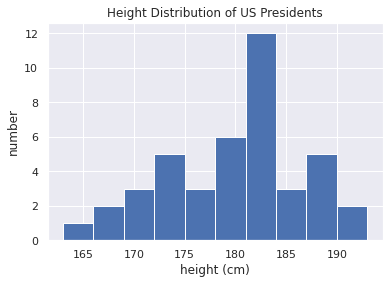

In [ ]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');